In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,52.747130,26.812121,9.581317,-2.759655,24.714089
1,53.164138,37.061656,11.021717,2.370057,16.392733
2,59.796903,8.755671,8.131381,-1.859225,18.415459
3,53.502097,1.146704,13.047542,9.615628,21.553778
4,53.566452,2.592662,11.627331,5.395937,17.105384


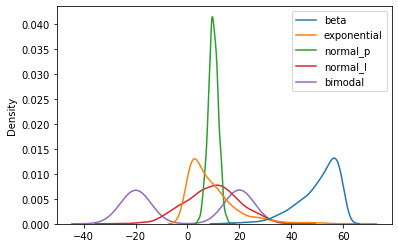

In [4]:
sns.kdeplot(data=df)

In [5]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.414891,9.413274,9.920169,9.705429,-0.000763
std,8.094693,9.516414,1.929260,10.302520,20.204758
min,14.978588,0.014017,4.081914,-27.708940,-29.273618
25%,46.098221,2.528584,8.655791,2.945558,-19.924063
50%,52.519333,6.749228,9.898189,10.255284,-0.168938
75%,56.577955,13.135931,11.208267,16.411346,19.825983
max,59.992758,65.527248,16.791847,41.449594,29.660006


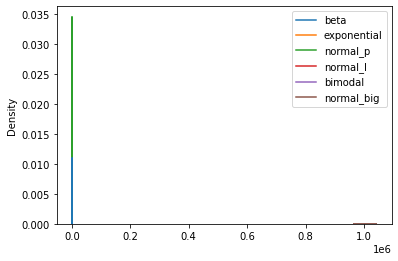

In [6]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

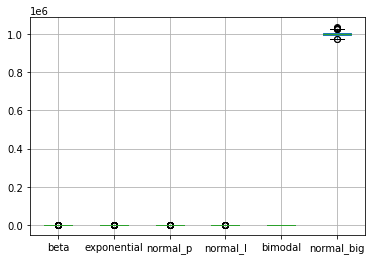

In [7]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [8]:
# Khai báo đối tượng RobustScaler
scaler = RobustScaler()

In [9]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.021737,1.891415,-0.124143,-0.966519,0.625987,0.956559
1,0.061529,2.857682,0.440172,-0.585575,0.416645,-0.150672
2,0.694442,0.189156,-0.692194,-0.899651,0.467531,0.024147
3,0.093778,-0.528174,1.233842,-0.047502,0.546483,-0.901238
4,0.099918,-0.391857,0.677437,-0.360866,0.434574,0.312050


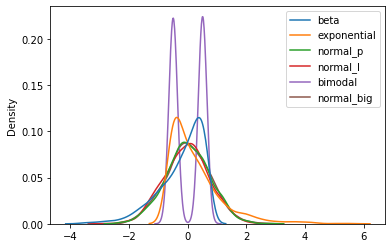

In [10]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [11]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.200811,2.511510e-01,0.008611,-0.040834,0.004231,0.006613
std,0.772414,8.971531e-01,0.755839,0.765089,0.508295,0.761842
min,-3.582223,-6.349572e-01,-2.278680,-2.819309,-0.732192,-2.069179
25%,-0.612717,-3.978982e-01,-0.486742,-0.542837,-0.496984,-0.475506
50%,0.000000,4.187731e-17,0.000000,0.000000,0.000000,0.000000
75%,0.387283,6.021018e-01,0.513258,0.457163,0.503016,0.524494
max,0.713131,5.541256e+00,2.700773,2.316560,0.750413,2.692528


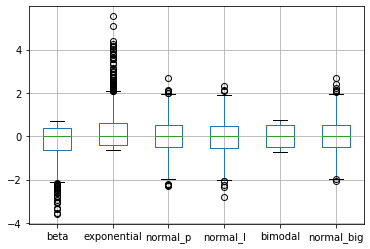

In [12]:
df_s.boxplot()

In [13]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.582223096675785,
 -0.6349572161228044,
 -2.2786796472957134,
 -2.8193094786667587,
 -0.732192373116415,
 -2.069179252915498]

In [14]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7131311681136623,
 5.541255782106453,
 2.7007732806147073,
 2.316560269097002,
 0.7504128107790695,
 2.6925282647750532]

In [15]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.25193329e+01,  6.74922802e+00,  9.89818866e+00,  1.02552842e+01,
       -1.68938087e-01,  9.99734198e+05])